<a href="https://colab.research.google.com/github/ethane66/MSFT-Talent-AI/blob/main/Proyecto_final_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Tabla de resultados:


,Instituto,Reseña,Polaridad,Sentimiento
0,Instituto A,Los profesores son excelentes y el ambiente es...,0.00,Neutral
1,Instituto A,"No me gustó la organización del curso, fue un ...",0.00,Neutral
2,Instituto A,Las instalaciones están muy limpias y modernas.,0.00,Neutral
3,Instituto A,"Todo estuvo perfecto, aprendí mucho y me sentí...",0.00,Neutral
4,Instituto A,Algunos profesores no se preparaban bien para ...,0.00,Neutral
5,Instituto B,Gran atención por parte del personal.,0.00,Neutral
6,Instituto B,"El curso estuvo bien, pero podría ser más prác...",0.00,Neutral
7,Instituto B,"Demasiado desorden, no volvería a tomar clases...",0.00,Neutral
8,Instituto B,Los horarios no se respetaban y eso fue molesto.,0.00,Neutral
9,Instituto B,La experiencia fue muy positiva en general.,0.05,Positiva


📁 Archivo guardado: analisis_reseñas.csv


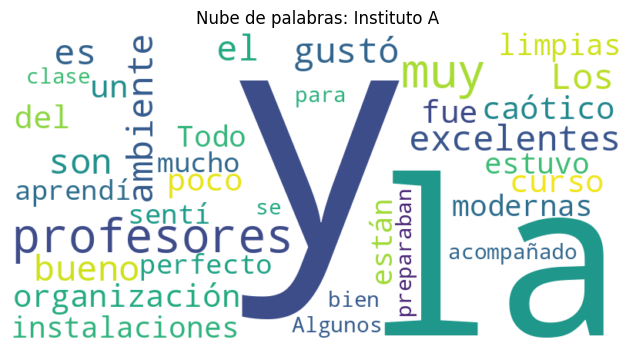

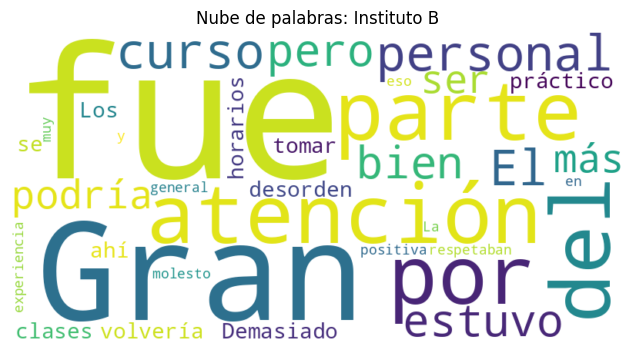


📈 Comparación de sentimiento promedio:
Instituto A: 0.00
Instituto B: 0.01

🏆 Instituto B tiene mejores reseñas en promedio.


In [2]:
# 📦 Instalar librerías necesarias
!pip install textblob wordcloud matplotlib pandas

# 📚 Importar librerías
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# 📝 Reseñas de dos institutos (reemplaza estos textos con los reales)
instituto_a = {
    "nombre": "Instituto A",
    "reseñas": [
        "Los profesores son excelentes y el ambiente es muy bueno.",
        "No me gustó la organización del curso, fue un poco caótico.",
        "Las instalaciones están muy limpias y modernas.",
        "Todo estuvo perfecto, aprendí mucho y me sentí acompañado.",
        "Algunos profesores no se preparaban bien para la clase.",
    ]
}

instituto_b = {
    "nombre": "Instituto B",
    "reseñas": [
        "Gran atención por parte del personal.",
        "El curso estuvo bien, pero podría ser más práctico.",
        "Demasiado desorden, no volvería a tomar clases ahí.",
        "Los horarios no se respetaban y eso fue molesto.",
        "La experiencia fue muy positiva en general."
    ]
}

# 🔍 Función para analizar reseñas
def analizar_reseñas(instituto):
    resultados = []
    for reseña in instituto["reseñas"]:
        blob = TextBlob(reseña)
        polaridad = blob.sentiment.polarity
        clasificacion = "Positiva" if polaridad > 0 else "Negativa" if polaridad < 0 else "Neutral"
        resultados.append({
            "Instituto": instituto["nombre"],
            "Reseña": reseña,
            "Polaridad": round(polaridad, 2),
            "Sentimiento": clasificacion
        })
    return resultados

# 🧠 Analizar ambos institutos
resultados_a = analizar_reseñas(instituto_a)
resultados_b = analizar_reseñas(instituto_b)

# 🧾 Crear DataFrame y mostrarlo
df = pd.DataFrame(resultados_a + resultados_b)
print("📊 Tabla de resultados:")
display(df)

# 💾 Guardar resultados en CSV
df.to_csv("analisis_reseñas.csv", index=False)
print("📁 Archivo guardado: analisis_reseñas.csv")

# ☁️ Nube de palabras para cada instituto
def mostrar_nube(instituto):
    texto = " ".join(instituto["reseñas"])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto)
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Nube de palabras: {instituto['nombre']}")
    plt.show()

mostrar_nube(instituto_a)
mostrar_nube(instituto_b)

# 📈 Comparar institutos por polaridad promedio
promedio_a = df[df["Instituto"] == instituto_a["nombre"]]["Polaridad"].mean()
promedio_b = df[df["Instituto"] == instituto_b["nombre"]]["Polaridad"].mean()

print("\n📈 Comparación de sentimiento promedio:")
print(f"{instituto_a['nombre']}: {promedio_a:.2f}")
print(f"{instituto_b['nombre']}: {promedio_b:.2f}")

if promedio_a > promedio_b:
    print(f"\n🏆 {instituto_a['nombre']} tiene mejores reseñas en promedio.")
elif promedio_b > promedio_a:
    print(f"\n🏆 {instituto_b['nombre']} tiene mejores reseñas en promedio.")
else:
    print("\n⚖️ Ambos institutos tienen reseñas igual de buenas.")
